In [108]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

In [80]:
# get data
data = keras.datasets.fashion_mnist

In [81]:
# splitting up data (all numpy arrays)
(train_img, train_labels), (test_img, test_lables) = data.load_data()

In [82]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [83]:
# scale data for faster computation
max_pixel_value = 255.0
train_img = train_img/max_pixel_value
test_img = test_img/max_pixel_value


In [84]:
# Define model architecture

# layer 0: Input layer (img dims)
img_rows, img_cols = train_img[0].shape

# layer 1: Activation layer ("hidden" layer)
hidden_layer_factor = 0.1 
neurons_in_hidden_layer = round(img_rows * img_cols * hidden_layer_factor)
rectified_linear_unit="relu"

# layer 2: output layer
neurons_in_output_layer = len(class_names)
predicted_probabilty_distribution="softmax"

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(img_rows, img_cols)),
    keras.layers.Dense(neurons_in_hidden_layer,activation=rectified_linear_unit),
    keras.layers.Dense(neurons_in_output_layer, activation=predicted_probabilty_distribution)
])


In [85]:
# Parameters for model

model.compile(
    optimizer="adam", 
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

In [88]:
# Train model

trained_model_name = 'clothing_identification_model.h5'

# simple early stopping
# https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/
# https://keras.io/api/callbacks/early_stopping/

es_quantity_monitored = 'loss'
es_training_mode = 'auto'
num_epochs_without_improvements = 3

es = EarlyStopping(
    monitor=es_quantity_monitored, 
    mode=es_training_mode, 
    patience=num_epochs_without_improvements,
    verbose=1)

# simple model checkpoint
mc_quantity_monitored = 'accuracy'
mc_training_mode = 'max'

mc = ModelCheckpoint(
    trained_model_name, 
    monitor=mc_quantity_monitored, 
    mode=mc_training_mode, 
    verbose=1, 
    save_best_only=True)

num_epochs = 100

model.fit(
    train_img, 
    train_labels, 
    epochs=num_epochs,
    callbacks=[es, mc]
)

Epoch 1/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3866 - accuracy: 0.8608

Epoch 00001: accuracy improved from -inf to 0.86078, saving model to best_model.h5
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3506 - accuracy: 0.8729

Epoch 00002: accuracy improved from 0.86078 to 0.87290, saving model to best_model.h5
Epoch 3/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3247 - accuracy: 0.8807

Epoch 00003: accuracy improved from 0.87290 to 0.88068, saving model to best_model.h5
Epoch 4/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3063 - accuracy: 0.8876

Epoch 00004: accuracy improved from 0.88068 to 0.88760, saving model to best_model.h5
Epoch 5/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2931 - accuracy: 0.8920

Epoch 00005: accuracy improved from 0.88760 to 0.89197, saving model to best_model.h5
Epoch 6/100
1875/1875 [==============================

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0795 - accuracy: 0.9702

Epoch 00090: accuracy did not improve from 0.97038
Epoch 91/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0758 - accuracy: 0.9722

Epoch 00091: accuracy improved from 0.97038 to 0.97218, saving model to best_model.h5
Epoch 92/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0758 - accuracy: 0.9714

Epoch 00092: accuracy did not improve from 0.97218
Epoch 93/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0782 - accuracy: 0.9707

Epoch 00093: accuracy did not improve from 0.97218
Epoch 94/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0729 - accuracy: 0.9730

Epoch 00094: accuracy improved from 0.97218 to 0.97297, saving model to best_model.h5
Epoch 95/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0776 - accuracy: 0.9709

Epoch 00095: accuracy did not improve from 0.97297
Epoch 9

In [94]:
# loading best model and checking accuracy

saved_model = load_model(trained_model_name)
test_loss, train_acc = saved_model.evaluate(train_img, train_labels, verbose=0)
test_loss, test_acc = saved_model.evaluate(test_img, test_lables, verbose=0)
print(f"train accuracy: {round(train_acc, 3)}, test accuracy: {round(test_acc, 3)}")

train accuracy: 0.973, test accuracy: 0.877


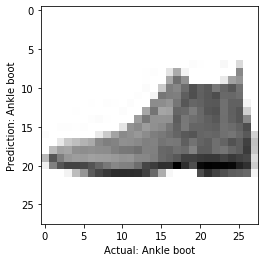

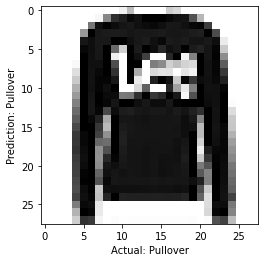

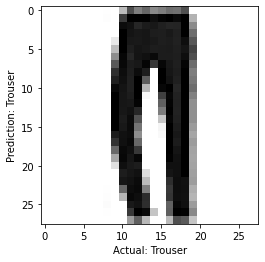

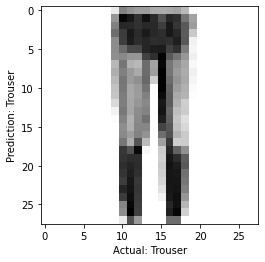

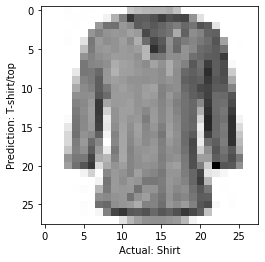

In [115]:
# Display model predictions 

predictions = saved_model.predict(test_img)

for i in range(5):
    plt.figure()
    plt.grid(False)
    plt.imshow(test_img[i], cmap=plt.cm.binary)
    plt.xlabel(f"Actual: {class_names[test_lables[i]]}")
    plt.ylabel(f"Prediction: {class_names[np.argmax(predictions[i])]}")